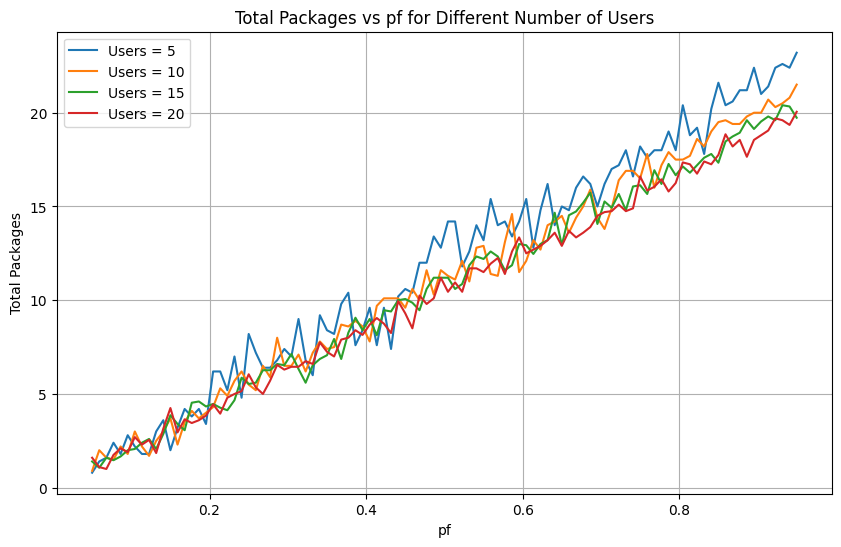

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_coefficient(n, k):
    return np.math.comb(n, k)

def Pr(i, N, pr):
    binomial_coefficient_value = binomial_coefficient(N, i)
    term1 = (1 - pr) ** (N - i)
    term2 = pr ** i
    probability = binomial_coefficient_value * term1 * term2
    return probability

def Pf(i, N, M, pf):
    binomial_coefficient_value = binomial_coefficient(M - N, i)
    term1 = (1 - pf) ** (M - N - i)
    term2 = pf ** i
    probability = binomial_coefficient_value * term1 * term2
    return probability

def calculate_pi_n(matrix, M):
    pi_n_values = []
    for N in range(M + 1):
        pi_n = np.sum(matrix[N]) / M
        pi_n_values.append(pi_n)
    return np.array(pi_n_values)

def simulate_package_distribution(M, A, pf_values, pr):
    package_distribution_values = []

    for pf in pf_values:
        matrix = np.random.choice([0, 1], size=(M + 1, A), p=[1 - pf, pf])
        pi_n_values = calculate_pi_n(matrix, M)
        total_packages = np.sum(pi_n_values)
        package_distribution_values.append(total_packages)

    return np.array(package_distribution_values)

M = 20  # Số người dùng
A = 20  # Số slot
pr = 0.2

# Giới hạn giá trị pf từ 0.05 đến 0.95
pf_values = np.linspace(0.05, 0.95, 100)

packages_user_5 = simulate_package_distribution(5, A, pf_values, pr)
packages_user_10 = simulate_package_distribution(10, A, pf_values, pr)
packages_user_15 = simulate_package_distribution(15, A, pf_values, pr)
packages_user_20 = simulate_package_distribution(20, A, pf_values, pr)

plt.figure(figsize=(10, 6))
plt.plot(pf_values, packages_user_5, label='Users = 5')
plt.plot(pf_values, packages_user_10, label='Users = 10')
plt.plot(pf_values, packages_user_15, label='Users = 15')
plt.plot(pf_values, packages_user_20, label='Users = 20')
plt.xlabel('pf')
plt.ylabel('Total Packages')
plt.title('Total Packages vs pf for Different Number of Users')
plt.legend()
plt.grid(True)
plt.show()
